# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`

## We'll get some synthetic dataset and get to work

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## We want to try some non linear curvy datasets

In [0]:
n = 10000
std = 6
X = np.random.random((n,2)) * (2*std) - (std)
y = np.cos(X[:,0]) + np.sin(X[:,1])

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 2)
(8000,)
(2000, 2)
(2000,)


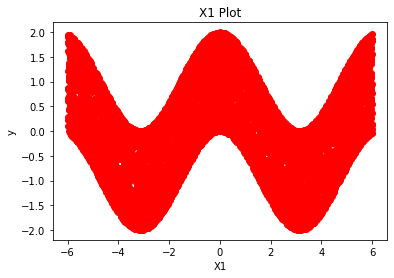

In [30]:
# Visualising the dataset
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.title('X1 Plot')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()


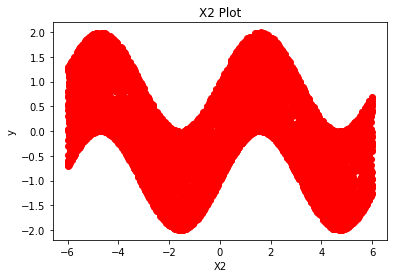

In [31]:
# Visualising the dataset
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.title('X2 Plot')
plt.xlabel('X2')
plt.ylabel('y')
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


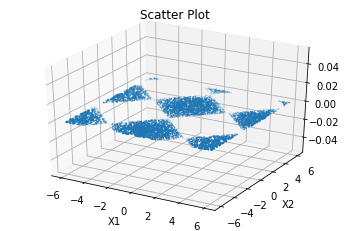

In [35]:
# Visualising the dataset with the target variable
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_train[:,0], X_train[:,1], y_train)
plt.title('Scatter Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [0]:
N, D = X_train.shape

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (D,)),
                                    tf.keras.layers.Dense(40, activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [0]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')

In [39]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8875 - val_loss: 0.8132
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.8003 - val_loss: 0.7369
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7009 - val_loss: 0.6371
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5978 - val_loss: 0.5601
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5242 - val_loss: 0.5030
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - val_loss: 0.4744
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - val_loss: 0.4682
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4487 - val_loss: 0.4595
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4420 - val_loss: 0.4574
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4365 - val_lo

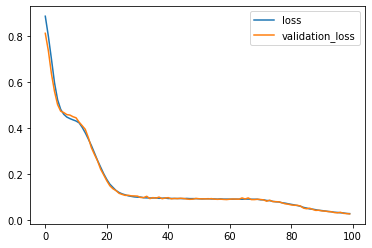

In [40]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

In [41]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


250/250 [==============================] - 0s 1ms/step - loss: 0.0271
Train eval:  0.02712416648864746
63/63 [==============================] - 0s 1ms/step - loss: 0.0271
Test eval:  0.027080269530415535


In [0]:
y_pred = model.predict(X_test)[:,0]

In [43]:
print(y_test.shape)
print(y_pred.shape)

(2000,)
(2000,)


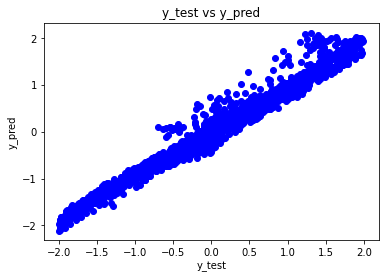

In [44]:
plt.scatter(y_test, y_pred, color = 'b')
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

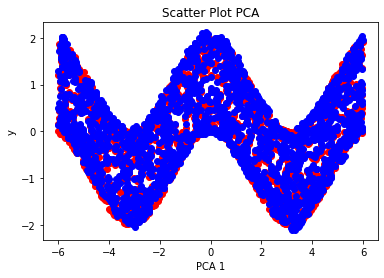

In [46]:
# Visualising the dataset
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.scatter(X_test[:,0], y_pred, color = 'b')
plt.title('Scatter Plot PCA')
plt.xlabel('PCA 1')
plt.ylabel('y')
plt.show()

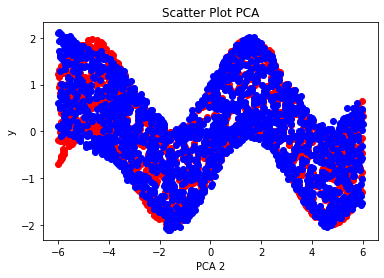

In [47]:
# Visualising the dataset
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.scatter(X_test[:,1], y_pred, color = 'b')
plt.title('Scatter Plot PCA')
plt.xlabel('PCA 2')
plt.ylabel('y')
plt.show()

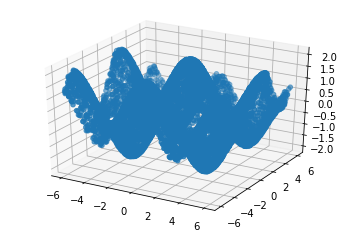

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

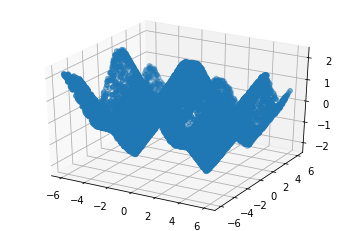

In [67]:
y_pred = model.predict(X).flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y_pred)
plt.show()